In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

def Amplitude(omega, zeta): 
    """Analytic amplitude calculation"""
    A = 1/math.sqrt((1-omega**2)**2+(2*zeta*omega)**2)
    return A

zeta_0 = 0.1   # Damping ratio
w_min = 0.0    # Start frequency
w_max = 10.0   # End frequency
N_omega = 300  # Number of points per interval    

w = np.linspace(w_min, w_max, N_omega).reshape(-1, 1)
Amplitude = np.vectorize(Amplitude)
a = Amplitude(w, zeta_0)

rnd_indices = np.random.rand(len(w)) < 0.80

x_train = w[rnd_indices]
y_train = a[rnd_indices]
x_test = w[~rnd_indices]
y_test = a[~rnd_indices]

# Create a model
def baseline_model():
    height = 100
    model = Sequential()    
    model.add(Dense(height, input_dim=1, activation='tanh', kernel_initializer='uniform'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='uniform'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='uniform'))
    model.add(Dense(1, input_dim=height, activation='linear', kernel_initializer='uniform'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mse', optimizer=sgd)
    return model

# Training the model
model = baseline_model()
model.fit(x_train, y_train, epochs=1000, verbose = 0)

Using TensorFlow backend.


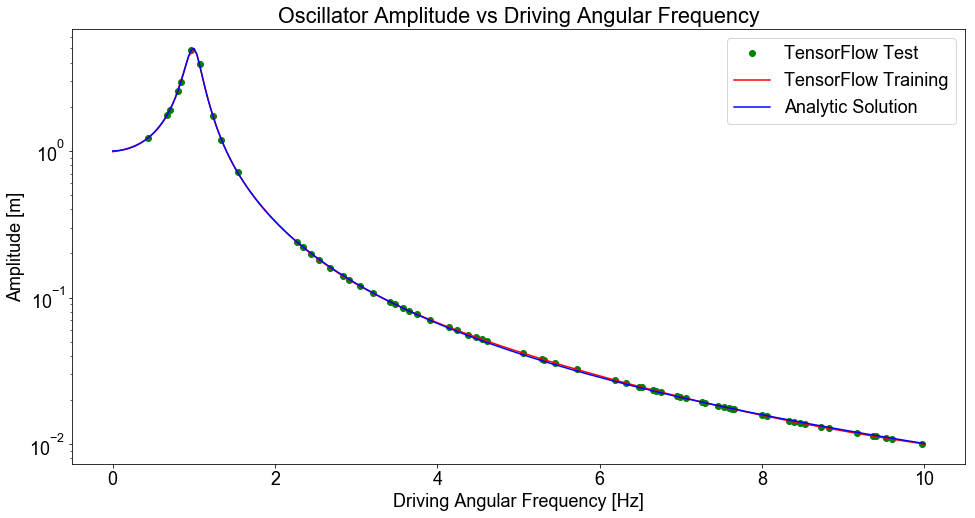

In [4]:
plt.figure(figsize=(16,8))
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = "18"

plt.semilogy(x_test, model.predict(x_test), 'og')
plt.semilogy(x_train, model.predict(x_train), 'r')
plt.semilogy(w, a, 'b')

plt.xlabel('Driving Angular Frequency [Hz]')
plt.ylabel('Amplitude [m]')
plt.title('Oscillator Amplitude vs Driving Angular Frequency')
plt.legend(['TensorFlow Test', 'TensorFlow Training', 'Analytic Solution'])
plt.show()

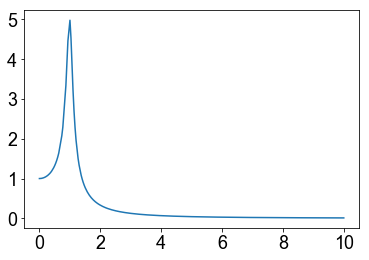

In [7]:
plt.plot(x_train,y_train)

In [11]:
model.predict([1])

array([[ 4.95265102]], dtype=float32)